### Publicis Media: Composition predictors

##### Data

In [17]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/emolodniak/jupyter/main/randomforest/displaytest.csv')
df.head()

,TOUCHPOINT,MONTH,SITE,IMPRESSIONS,AGE_MIN,AGE_DIFF,SEX,INCOME,UNWEIGHTED_REACH,COMPOSITION
0,DISPLAY,2018-01-01,VK,10095780,16,28,W,1,435,0.647
1,DISPLAY,2016-02-01,MAILPOST,124038798,25,30,P,1,3495,0.880
2,IVIDEO,2016-08-01,IMHO,1549885,20,34,W,1,89,0.597
3,DISPLAY,2016-03-01,OK,22885630,20,15,W,1,367,0.636
4,IVIDEO,2016-06-01,GPMD,781124,16,19,W,0,91,0.766


In [18]:
df.drop(columns='MONTH', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TOUCHPOINT        1783 non-null   object 
 1   SITE              1783 non-null   object 
 2   IMPRESSIONS       1783 non-null   int64  
 3   AGE_MIN           1783 non-null   int64  
 4   AGE_DIFF          1783 non-null   int64  
 5   SEX               1783 non-null   object 
 6   INCOME            1783 non-null   int64  
 7   UNWEIGHTED_REACH  1783 non-null   int64  
 8   COMPOSITION       1783 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 125.5+ KB


##### Data info

In [21]:
pd.set_option('display.max_colwidth', None)
dic = pd.read_csv('https://raw.githubusercontent.com/emolodniak/jupyter/main/randomforest/dictionary.csv')
dic

,Variable,Value,Format,Comment
0,TOUCHPOINT,DISPLAY/IVIDEO,Text,-
1,MONTH,Period,Date,dd.mm.yyyy
2,SITE,Site name,Text,-
3,IMPRESSIONS,Impressions,Number,-
4,AGE_MIN,Target audience minimum age,Number,-
5,AGE_DIFF,Target audience age difference,Number,(Target audience maximum age) - (Target audience minimum age)
6,SEX,Sex,Text,"W - woman, M - man, P - all"
7,INCOME,Income group,Binary,"0 - without income group, 1 - mid+"
8,UNWEIGHTED_REACH,Sample size,Number,Sample size in TNS panel
9,COMPOSITION,Composition,Number,-


#### Random Forest

In [19]:
# X = df[df.SITE.isin(['GPMD', 'IMHO', 'STS'])]
X = df.drop(columns='COMPOSITION')
X.shape

(1783, 8)

In [20]:
#pd.options.mode.chained_assignment = None
#X.drop(columns='COMPOSITION', inplace=True)
X.head()

,TOUCHPOINT,SITE,IMPRESSIONS,AGE_MIN,AGE_DIFF,SEX,INCOME,UNWEIGHTED_REACH
0,DISPLAY,VK,10095780,16,28,W,1,435
1,DISPLAY,MAILPOST,124038798,25,30,P,1,3495
2,IVIDEO,IMHO,1549885,20,34,W,1,89
3,DISPLAY,OK,22885630,20,15,W,1,367
4,IVIDEO,GPMD,781124,16,19,W,0,91


In [21]:
y = df[['COMPOSITION']]
y.head()

,COMPOSITION
0,0.647
1,0.880
2,0.597
3,0.636
4,0.766


In [31]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load the dataset and separate the features and target variable
# Assuming 'X' contains the features and 'y' contains the target variable
X = df.drop(columns='COMPOSITION')
# Encode categorical variables
# Let's assume 'cat_vars' is a list of categorical variable column names
cat_vars = ['TOUCHPOINT','SITE','SEX']
label_encoders = {}
for var in cat_vars:
    label_encoders[var] = LabelEncoder()
    X[var] = label_encoders[var].fit_transform(X[var])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #, stratify=X[['TOUCHPOINT','SITE','SEX']]

# Create a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using a metric such as mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


/tmp/ipykernel_1072/284815286.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean Squared Error: 0.007764805979831929


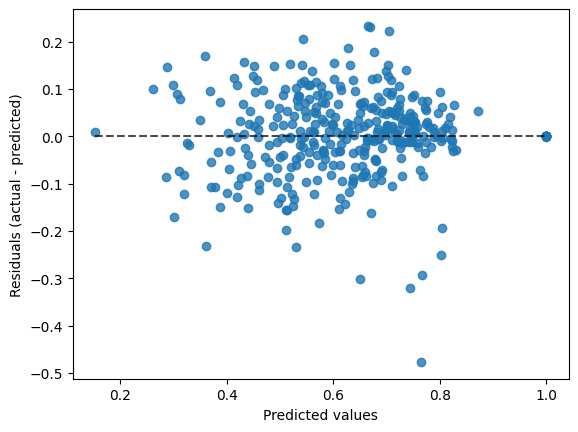

In [44]:
from sklearn.metrics import PredictionErrorDisplay
display = PredictionErrorDisplay(y_true=y_test.COMPOSITION.values, y_pred=y_pred)
display.plot()
plt.show()


In [45]:
rf_model.feature_importances_

array([0.22473265, 0.13069194, 0.19883721, 0.04433726, 0.18831016,
       0.01805042, 0.04504492, 0.14999543])

In [51]:
X.columns

Index(['TOUCHPOINT', 'SITE', 'IMPRESSIONS', 'AGE_MIN', 'AGE_DIFF', 'SEX',
       'INCOME', 'UNWEIGHTED_REACH'],
      dtype='object')

<Axes: >

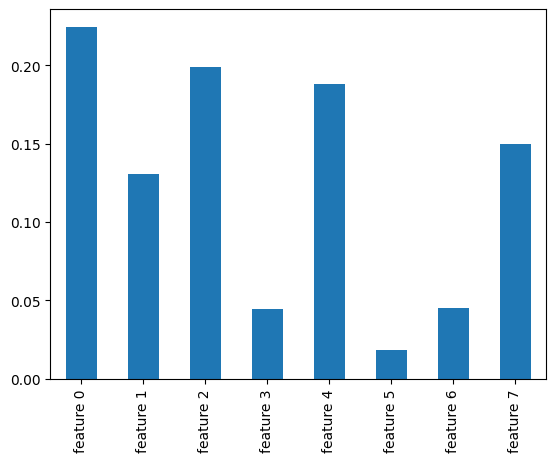

In [49]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = rf_model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.plot.bar();

In [47]:
import numpy as np
np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

array([0.01862149, 0.02284939, 0.02629502, 0.01113037, 0.02266488,
       0.00674221, 0.0109513 , 0.01881383])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X.TOUCHPOINT.value_counts(normalize=True)

TOUCHPOINT
1    0.537858
0    0.462142
Name: proportion, dtype: float64

In [26]:
X_train.TOUCHPOINT.value_counts(normalize=True)

TOUCHPOINT
1    0.529453
0    0.470547
Name: proportion, dtype: float64

In [27]:
X_test.TOUCHPOINT.value_counts(normalize=True)

TOUCHPOINT
1    0.571429
0    0.428571
Name: proportion, dtype: float64

In [30]:
X.SITE.value_counts(normalize=True).sort_values(descending=True)

TypeError: Series.sort_values() got an unexpected keyword argument 'descending'